In [1]:
import keras
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)
#np.random.seed(10)的作用：使得隨機數據可預測

In [2]:
#取得Keras CIFAR10 Dataset, 並分成Training 與 Test set
(x_img_train, y_label_train),(x_img_test, y_label_test) = cifar10.load_data()

In [5]:
print('train data:','images:',x_img_train.shape,
     'labels:',y_label_train.shape)
print('test data:', 'images:',x_img_test.shape,
     'labels:', y_label_test.shape)

train data: images: (50000, 32, 32, 3) labels: (50000, 1)
test data: images: (10000, 32, 32, 3) labels: (10000, 1)


In [7]:
#對資料正規化、one hot encoding
x_img_train_normalize = x_img_train.astype('float32')/255
x_img_test_normalize = x_img_test.astype('float32')/255

y_label_train_onehot = keras.utils.to_categorical(y_label_train)
y_label_test_onehot = keras.utils.to_categorical(y_label_test)

print(y_label_train_onehot.shape)

(50000, 10)


# 建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [9]:
# 宣告採用序列模型
model = Sequential()

W0910 23:24:44.855329  6928 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\DL\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [10]:
#卷積層1與池化層1

In [11]:
model.add(Conv2D(filters= 32, kernel_size=(3,3),input_shape=(32,32,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D(pool_size = (2,2)))

W0910 23:28:33.467787  6928 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\DL\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0910 23:28:33.472747  6928 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\DL\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0910 23:28:33.497049  6928 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\DL\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters= 64, kernel_size=(3,3),input_shape=(32,32,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D(pool_size = (2,2)))

In [12]:
#卷積層3與池化層3

In [14]:
model.add(Conv2D(filters= 128, kernel_size=(3,3),input_shape=(32,32,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D(pool_size = (2,2)))

In [15]:
#卷積層4與池化層4

In [16]:
model.add(Conv2D(filters= 256, kernel_size=(3,3),input_shape=(32,32,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D(pool_size = (2,2)))

In [17]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [18]:
#建立平坦層
model.add(Flatten())

In [19]:
#建立全網路連接層
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))

In [20]:
#建立輸出層
model.add(Dense(10, activation='softmax'))

In [21]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 256)         295168    
__________

# 載入之前訓練的模型

In [22]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [23]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

W0910 23:38:07.817672  6928 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\DL\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0910 23:38:07.843464  6928 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\DL\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [24]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history = model.fit(x_img_train_normalize, y_label_train_onehot, validation_split=0.25,
                          epochs=12, batch_size=128, verbose=1)
#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

W0910 23:57:03.504657  6928 deprecation.py:323] From C:\Users\User\Anaconda3\envs\DL\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0910 23:57:03.616888  6928 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\DL\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 49s 1ms/step - loss: 1.5996 - acc: 0.4055 - val_loss: 1.2743 - val_acc: 0.5275
Epoch 2/12
37500/37500 [==============================] - 46s 1ms/step - loss: 1.1417 - acc: 0.5879 - val_loss: 0.9964 - val_acc: 0.6458
Epoch 3/12
37500/37500 [==============================] - 46s 1ms/step - loss: 0.9203 - acc: 0.6698 - val_loss: 0.9376 - val_acc: 0.6695
Epoch 4/12
37500/37500 [==============================] - 46s 1ms/step - loss: 0.7651 - acc: 0.7310 - val_loss: 0.8308 - val_acc: 0.7116
Epoch 5/12
37500/37500 [==============================] - 45s 1ms/step - loss: 0.6377 - acc: 0.7747 - val_loss: 0.8255 - val_acc: 0.7178
Epoch 6/12
37500/37500 [==============================] - 45s 1ms/step - loss: 0.5311 - acc: 0.8139 - val_loss: 0.8404 - val_acc: 0.7250
Epoch 7/12
37500/37500 [==============================] - 45s 1ms/step - loss: 0.4334 - acc: 0.8476 - val_loss: 0.8472 - val_acc

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_train_history(train, Validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[Validation])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train','validation'], loc = 'upper left')
    plt.show()

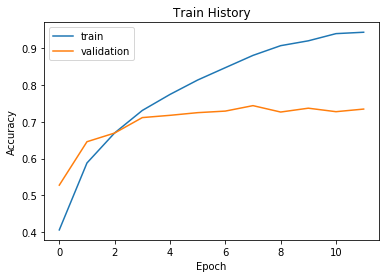

In [29]:
show_train_history('acc','val_acc')

# 作業:嘗試不同的loss

In [31]:
model.compile(loss = 'MSE', optimizer = 'Adam', metrics = ['accuracy'])
train_history = model.fit(x_img_train_normalize, y_label_train_onehot, validation_split=0.25,
                          epochs=12, batch_size=128, verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 50s 1ms/step - loss: 0.0095 - acc: 0.9361 - val_loss: 0.0444 - val_acc: 0.7245
Epoch 2/12
37500/37500 [==============================] - 49s 1ms/step - loss: 0.0081 - acc: 0.9453 - val_loss: 0.0422 - val_acc: 0.7374
Epoch 3/12
37500/37500 [==============================] - 50s 1ms/step - loss: 0.0077 - acc: 0.9485 - val_loss: 0.0463 - val_acc: 0.7141
Epoch 4/12
37500/37500 [==============================] - 51s 1ms/step - loss: 0.0071 - acc: 0.9526 - val_loss: 0.0449 - val_acc: 0.7284
Epoch 5/12
37500/37500 [==============================] - 51s 1ms/step - loss: 0.0076 - acc: 0.9498 - val_loss: 0.0458 - val_acc: 0.7194
Epoch 6/12
37500/37500 [==============================] - 48s 1ms/step - loss: 0.0066 - acc: 0.9565 - val_loss: 0.0468 - val_acc: 0.7160
Epoch 7/12
37500/37500 [==============================] - 49s 1ms/step - loss: 0.0067 - acc: 0.9558 - val_loss: 0.0468 - val_acc

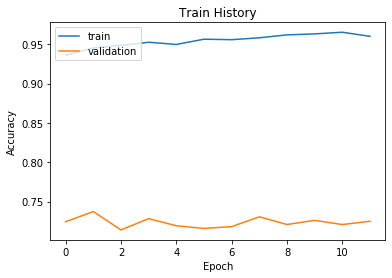

In [32]:
show_train_history('acc','val_acc')

In [33]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
train_history = model.fit(x_img_train_normalize, y_label_train_onehot, validation_split=0.25,
                          epochs=12, batch_size=128, verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 51s 1ms/step - loss: 0.0187 - acc: 0.9936 - val_loss: 0.2436 - val_acc: 0.9479
Epoch 2/12
37500/37500 [==============================] - 52s 1ms/step - loss: 0.0136 - acc: 0.9955 - val_loss: 0.2450 - val_acc: 0.9461
Epoch 3/12
37500/37500 [==============================] - 51s 1ms/step - loss: 0.0119 - acc: 0.9960 - val_loss: 0.2546 - val_acc: 0.9485
Epoch 4/12
37500/37500 [==============================] - 52s 1ms/step - loss: 0.0110 - acc: 0.9962 - val_loss: 0.2702 - val_acc: 0.9453
Epoch 5/12
37500/37500 [==============================] - 51s 1ms/step - loss: 0.0122 - acc: 0.9958 - val_loss: 0.2849 - val_acc: 0.9464
Epoch 6/12
37500/37500 [==============================] - 50s 1ms/step - loss: 0.0120 - acc: 0.9959 - val_loss: 0.2601 - val_acc: 0.9467
Epoch 7/12
37500/37500 [==============================] - 52s 1ms/step - loss: 0.0113 - acc: 0.9959 - val_loss: 0.2492 - val_acc

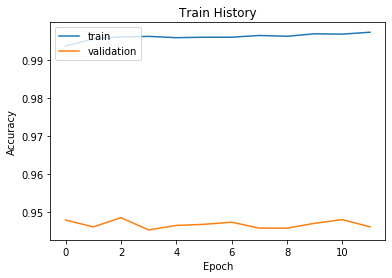

In [34]:
show_train_history('acc','val_acc')